### Tensorflow 2.0 Notebook

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tf.__version__

'2.0.0'

In [3]:
mnist = keras.datasets.mnist

In [4]:
(train_img, train_label), (test_img, test_label) = mnist.load_data()

In [5]:
train_img.shape, test_img.shape

((60000, 28, 28), (10000, 28, 28))

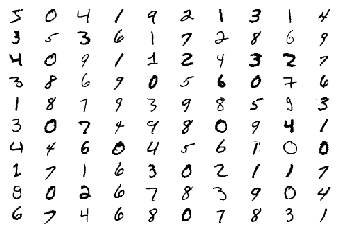

In [6]:
# Visualize the first 100 images from the training set
for i in range(100):
    ax = plt.subplot(10, 10, i+1)
    ax.axis('off')
    plt.imshow(train_img[i], cmap='Greys')

In [7]:
# Reshaping the training_images and test_images to lists of vectors with length 784
# instead of lists of 2D arrays. Same for the test_images

img_sz = train_img.shape[1]*train_img.shape[2]

train_data = train_img.reshape(train_img.shape[0], img_sz) 
test_data = test_img.reshape(test_img.shape[0], img_sz)

In [8]:
train_data.shape, test_data.shape

((60000, 784), (10000, 784))

In [9]:
#normalized data by pixel
train_data_nm = train_data/255.0
test_data_nm = test_data/255.0

In [10]:
#total number of classes 0-9
n_class = len(set(train_label))
n_class

10

In [11]:
# Create 1-hot encoded vectors using to_categorical
# to_categorical takes a list of integers (our labels) and makes them into 1-hot vectors
train_labels = to_categorical(train_label, n_class)
test_labels = to_categorical(test_label, n_class)

In [12]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [13]:
#build base model
model_1 = Sequential()
model_1.add(Dense(units=32, activation='sigmoid', input_shape=(img_sz,)))
model_1.add(Dense(units=n_class, activation='softmax'))
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [14]:
model_1.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
results_1 = model_1.fit(train_data_nm, train_labels, batch_size=128, epochs=50, verbose=False, 
                        validation_data=(test_data_nm, test_labels))

In [22]:
def visualize_nn_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.legend(['loss', 'val_loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['accuracy'])
    plt.plot(history['val_accuracy'])
    plt.legend(['accuracy', 'val_accuracy'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

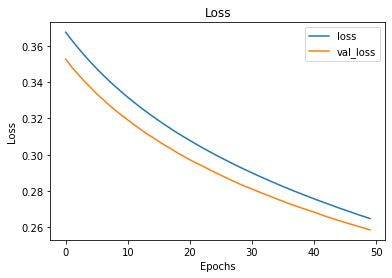

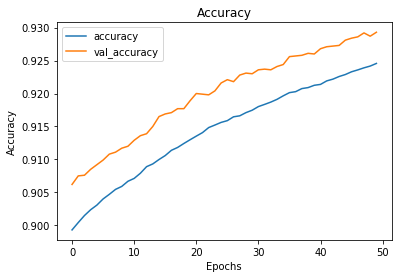

In [23]:
visualize_nn_results(results_1)

In [25]:
# Predicting once, then we can use these repeatedly in the next cell without recomputing the predictions.
predictions = model_1.predict(test_data)

# For pagination & style in second cell
page = 0
fontdict = {'color': 'black'}

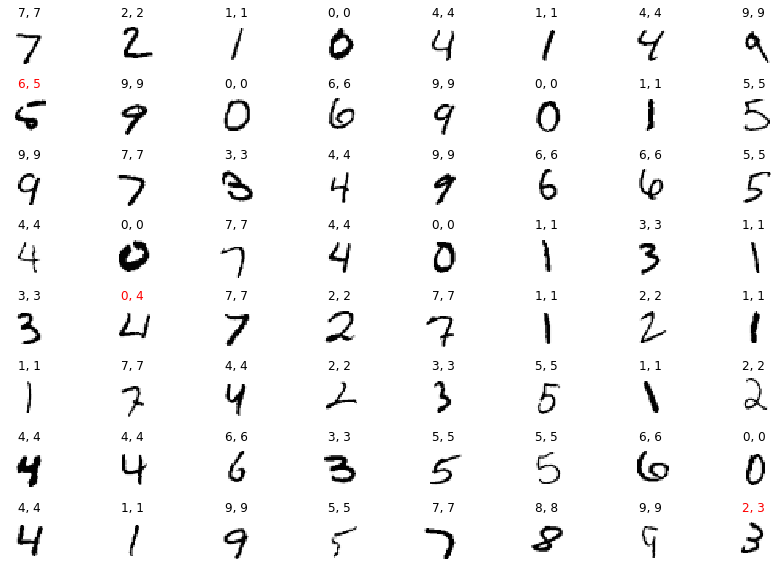

In [26]:
plt.figure(figsize=(12,8))

for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(test_img[i + page], cmap='Greys')
    prediction = np.argmax(predictions[i + page])
    true_value = np.argmax(test_labels[i + page])

    fontdict['color'] = 'black' if prediction == true_value else 'red'
    plt.title("{}, {}".format(prediction, true_value), fontdict=fontdict)

page += 64
plt.tight_layout()
plt.show()